In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from sklearn.decomposition import NMF

In [25]:
# Load the MAT file
mat_steady = h5py.File('./dataset/steady force 1.mat', 'r')
mat_incr_1 = h5py.File('./dataset/increasing force 1.mat', 'r') 
mat_incr_2 = h5py.File('./dataset/increasing force 2.mat', 'r')

print("Keys in mat file: ", mat_steady.keys())
grid_crds_steady = np.array(mat_steady['grid_crds'])
out_mat_steady = abs(np.array(mat_steady['out_mat']).T)
grid_crds_incr_1 = np.array(mat_incr_1['grid_crds'])
out_mat_incr_1 = abs(np.array(mat_incr_1['out_mat']).T)
grid_crds_incr_2 = np.array(mat_incr_2['grid_crds'])
out_mat_incr_2 = abs(np.array(mat_incr_2['out_mat']).T)


Keys in mat file:  <KeysViewHDF5 ['grid_crds', 'out_mat']>


# NMF

In [2]:
out_mat_incr_1 = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/increase_mat_one.csv", 
    delimiter=','
)
out_mat_incr_2 = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/increase_mat_two.csv", 
    delimiter=','
)
out_mat_steady = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/steady_mat.csv", 
    delimiter=','
)


In [21]:
# out_mat_steady = abs(out_mat_steady)
# out_mat_incr_1 = abs(out_mat_incr_1)
# out_mat_incr_2 = abs(out_mat_incr_2)

out_mat_steady[out_mat_steady==0] = 0
out_mat_incr_1[out_mat_incr_1==0] = 0
out_mat_incr_2[out_mat_incr_2==0] = 0

In [27]:
# def local_NMF_train(M, B_init, W_init, n_iter):
#     '''
#     @input
#     M:      magnitude spectrogram, a pxq non-negative matrix
#     B_init: initial basis matrix,  a pxk non-negative matrix
#     W_init: initial weight matrix, a kxq non-negative matrix
#     n_iter: number of iterations
    
#     @return
#     B:  basis matrix,  a pxk non-negative matrix
#     W:  weight matrix, a kxq non-negative matrix
#     '''
#     B = np.array(B_init)
#     W = np.array(W_init)
#     I = np.ones((M.shape[0], M.shape[1]))
    
#     for i in range(n_iter):
#         B = B * (((M / (B @ W)) @ W.T) / (I @ W.T))
#         W = W * ((B.T @ (M / (B @ W))) / (B.T @ I))      
        
#     return B, W

In [ ]:
model = NMF(n_components=4, init='random', max_iter=100, random_state=42)    
    
print(out_mat_steady.shape)
W = model.fit_transform(out_mat_steady)
H = model.components_
print(W.shape, H.shape)

plt.plot(H.T)
plt.show()


In [23]:
n_comps = [2, 4, 8, 16, 32] 

H_list_steady = []
W_list_steady = []
H_list_incr_1 = []
W_list_incr_1 = []
H_list_incr_2 = []
W_list_incr_2 = []

for each_n in n_comps:
    
    # model_steady = NMF(n_components=each_n, init='random', max_iter=1000, random_state=42)    
    # model_inc_1  = NMF(n_components=each_n, init='random', max_iter=1000, random_state=42)
    # model_inc_2  = NMF(n_components=each_n, init='random', max_iter=1000, random_state=42)
    
    model_steady = NMF(n_components=each_n, init='nndsvda', max_iter=1000)    
    model_inc_1  = NMF(n_components=each_n, init='nndsvda', max_iter=1000)
    model_inc_2  = NMF(n_components=each_n, init='nndsvda', max_iter=1000)
    
    W = model_steady.fit_transform(out_mat_steady)
    H = model_steady.components_
    H_list_steady.append(H.T)
    W_list_steady.append(W)
    
    W = model_inc_1.fit_transform(out_mat_incr_1)
    H = model_inc_1.components_
    H_list_incr_1.append(H.T)
    W_list_incr_1.append(W)
    
    W = model_inc_2.fit_transform(out_mat_incr_2)
    H = model_inc_2.components_
    H_list_incr_2.append(H.T)
    W_list_incr_2.append(W)
    
    

In [26]:
H_list_steady[4].shape


(73214, 32)

In [34]:
output_directory = "./MLSP-G2/decomposed_data/"

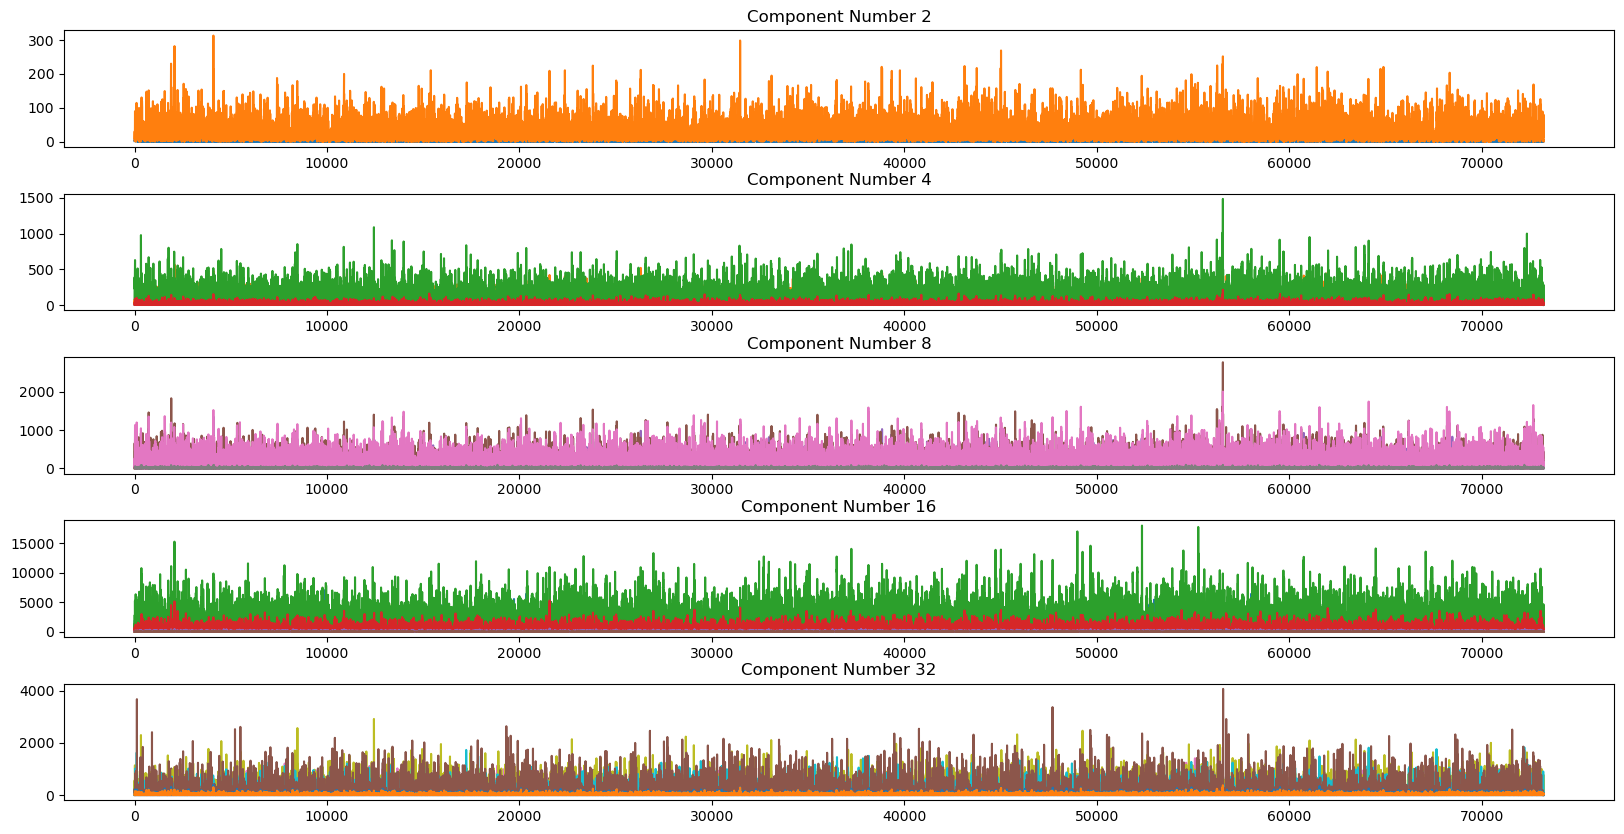

In [31]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_steady)):
    
    ax = plt.subplot(len(H_list_steady), 1, i + 1)
    plt.plot(H_list_steady[i])
    
    ax.set_title(f"Component Number {n_comps[i]}")

    np.savetxt(output_directory + 'steady_mat_nmf_compo_{}.csv'.format(n_comps[i]), H_list_steady[i], delimiter=',')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

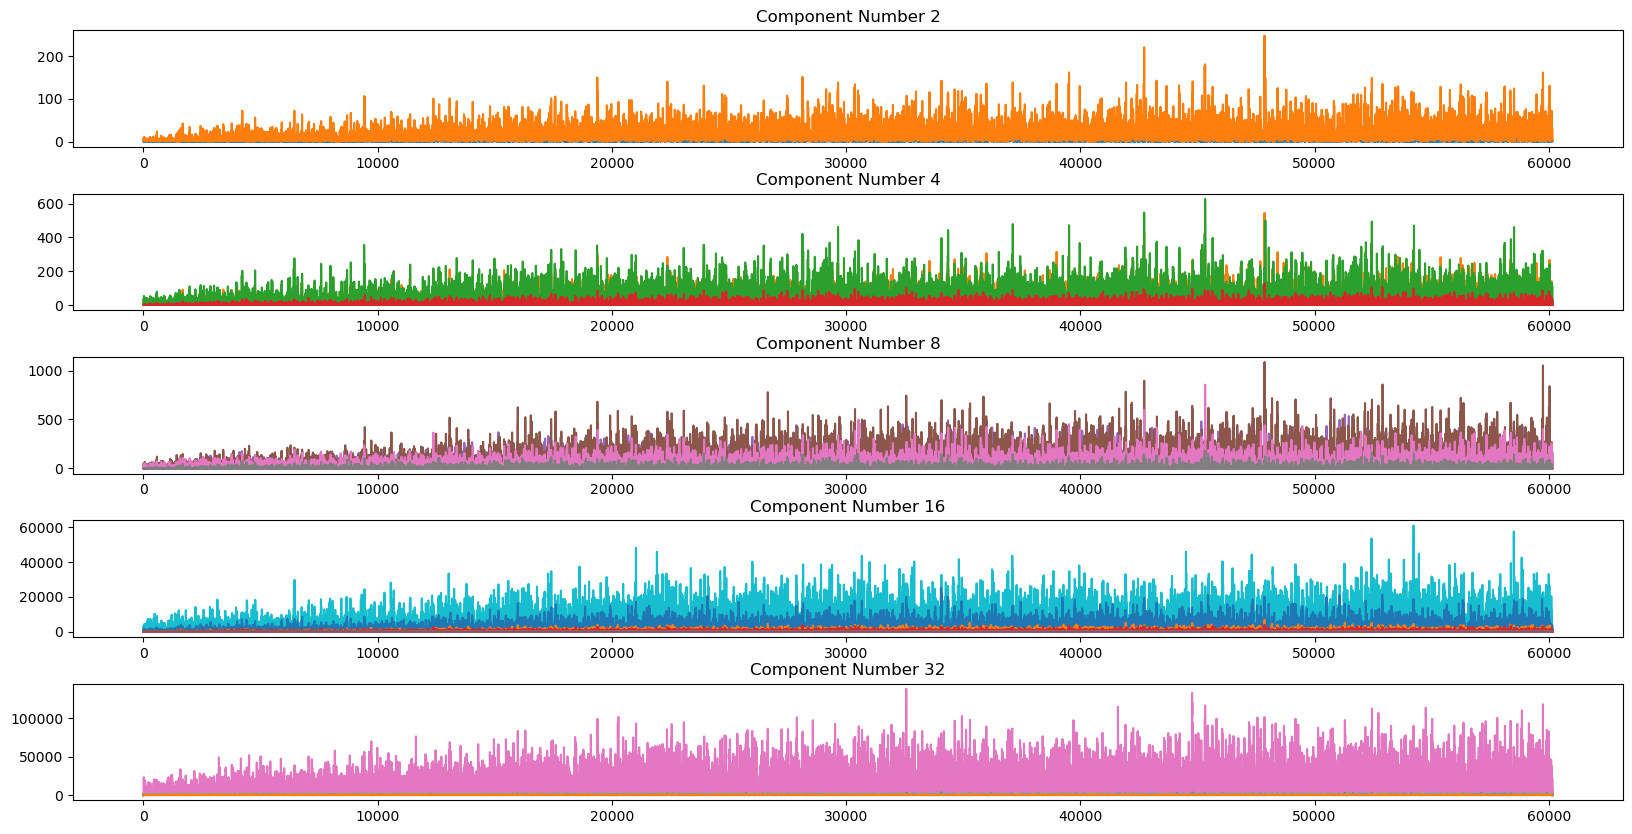

In [32]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_incr_1)):
    
    ax = plt.subplot(len(H_list_incr_1), 1, i + 1)
    plt.plot(H_list_incr_1[i])
    
    ax.set_title(f"Component Number {n_comps[i]}")

    np.savetxt(output_directory + 'increase_mat_one_nmf_compo_{}.csv'.format(n_comps[i]), H_list_incr_1[i], delimiter=',')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

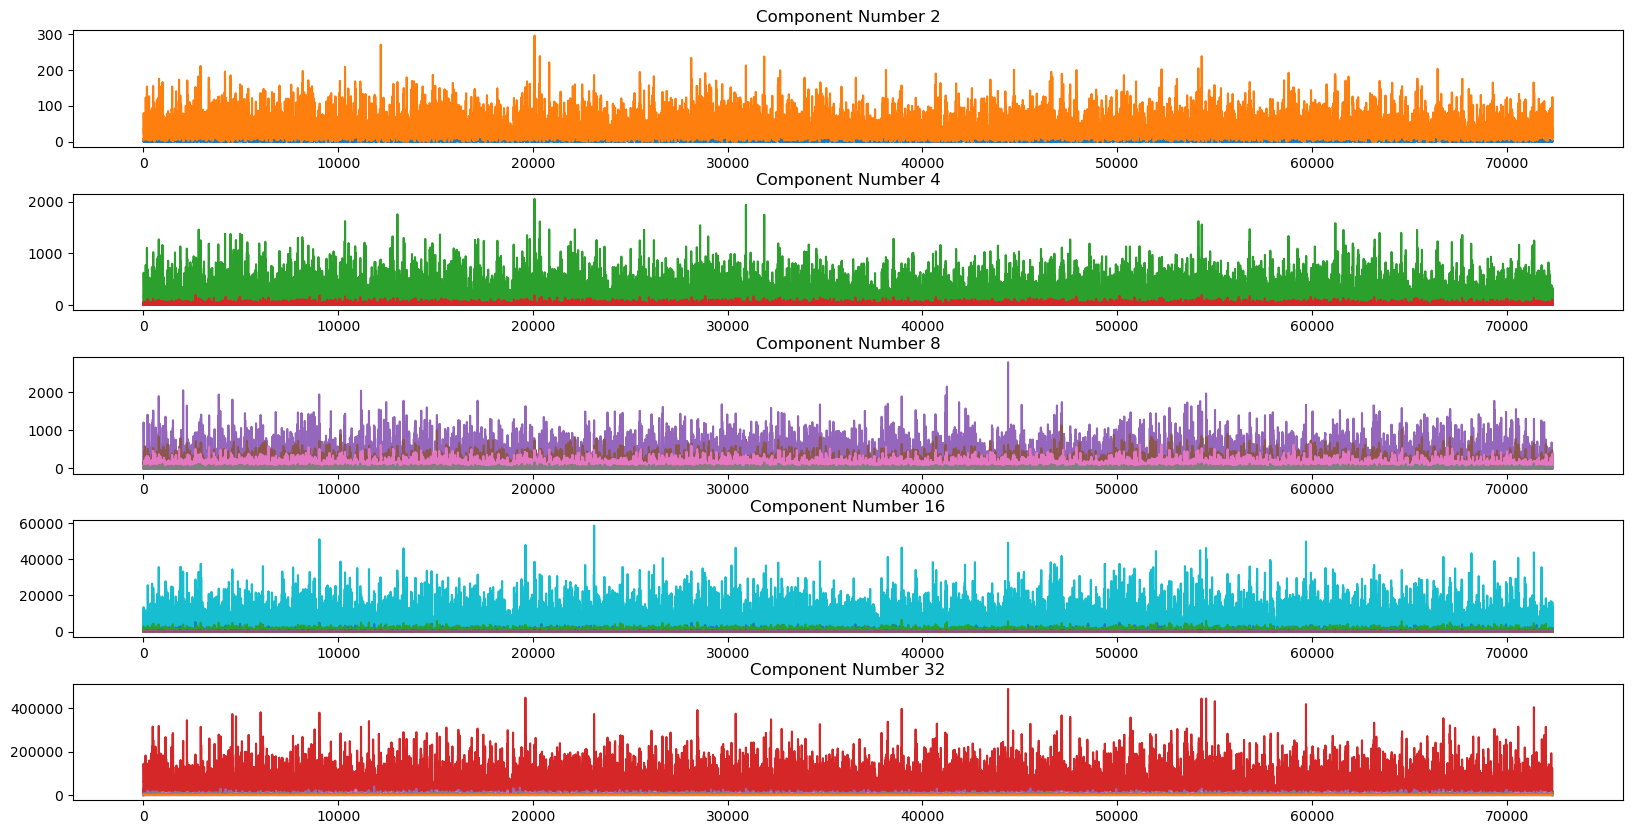

In [33]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_incr_2)):
    
    ax = plt.subplot(len(H_list_incr_2), 1, i + 1)
    plt.plot(H_list_incr_2[i])
    
    ax.set_title(f"Component Number {n_comps[i]}")

    np.savetxt(output_directory + 'increase_mat_two_nmf_compo_{}.csv'.format(n_comps[i]), H_list_incr_2[i], delimiter=',')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

# PCA

In [35]:
out_mat_incr_1 = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/increase_mat_one.csv", 
    delimiter=','
)
out_mat_incr_2 = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/increase_mat_two.csv", 
    delimiter=','
)
out_mat_steady = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/steady_mat.csv", 
    delimiter=','
)

(64, 73214)
(4, 73214)


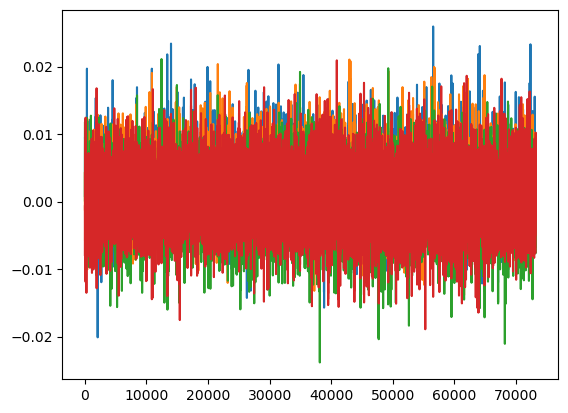

In [8]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=4)   
pca_model.fit(out_mat_steady)
pca_bases = pca_model.components_

print(out_mat_steady.shape)
print(pca_bases.shape)

plt.plot(pca_bases.T)
plt.show()

In [36]:
n_comps = [2, 4, 8, 16, 32] 

H_list_steady_pca = []
H_list_incr_1_pca = []
H_list_incr_2_pca = []

for each_n in n_comps:
    
    model_steady_pca = PCA(n_components=each_n)    
    model_inc_1_pca  = PCA(n_components=each_n)
    model_inc_2_pca  = PCA(n_components=each_n)
    
    model_steady_pca.fit(out_mat_steady)
    H = model_steady_pca.components_
    H_list_steady_pca.append(H.T)
    
    model_inc_1_pca.fit(out_mat_incr_1)
    H = model_inc_1_pca.components_
    H_list_incr_1_pca.append(H.T)
    
    model_inc_2_pca.fit(out_mat_incr_2)
    H = model_inc_2_pca.components_
    H_list_incr_2_pca.append(H.T)
    
    

In [10]:
H_list_steady_pca[0].shape

(73214, 2)

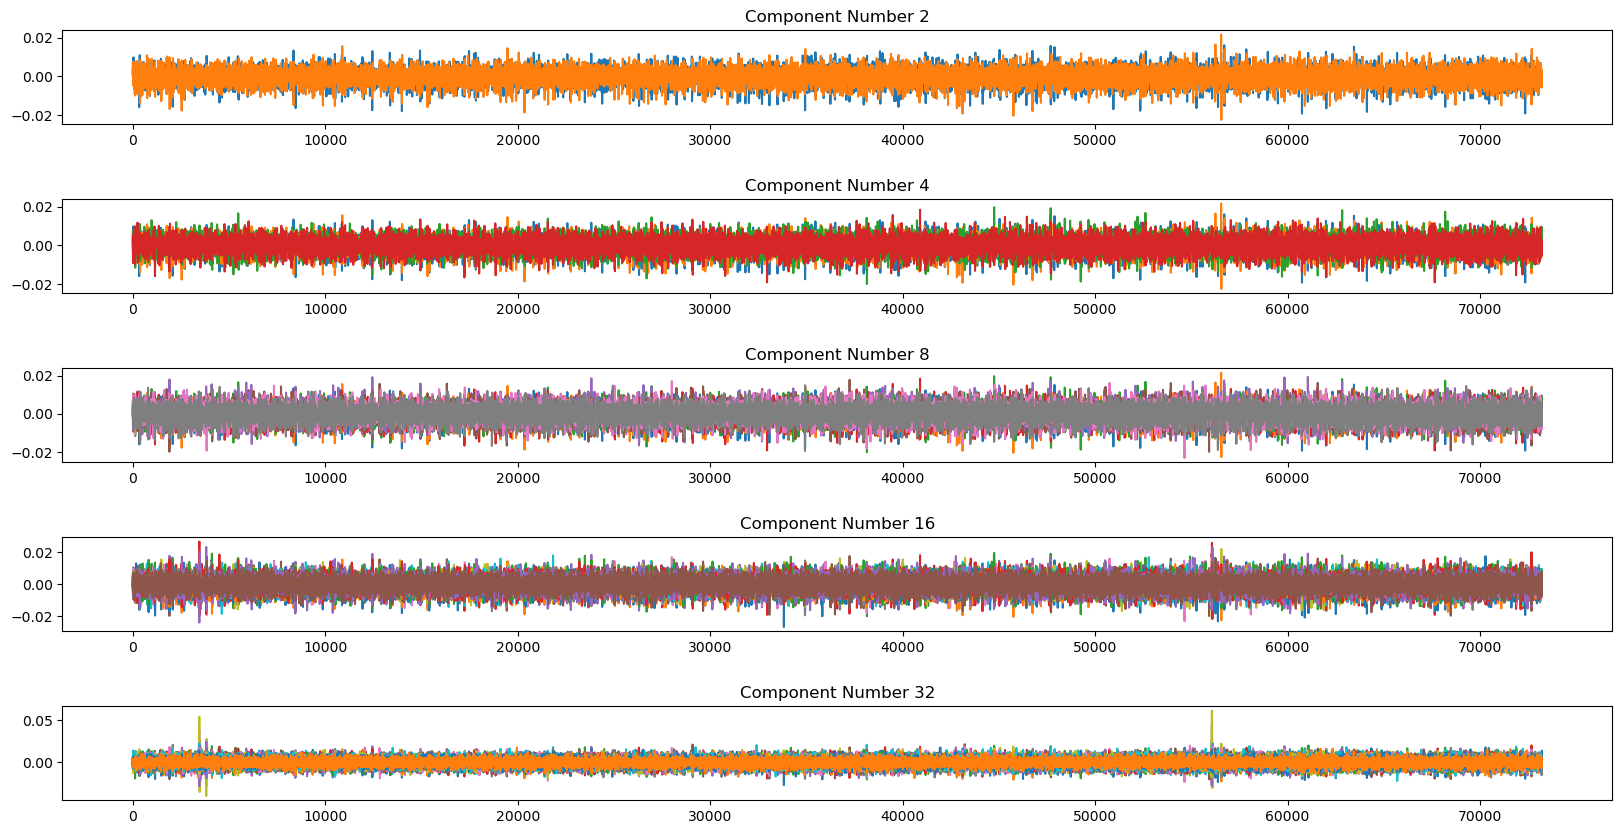

In [37]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_steady_pca)):
    
    ax_pca = plt.subplot(len(H_list_steady_pca), 1, i + 1)
    plt.plot(H_list_steady_pca[i])
    ax_pca.set_title(f"Component Number {n_comps[i]}")
    
    np.savetxt(output_directory + 'steady_mat_pca_compo_{}.csv'.format(n_comps[i]), H_list_steady_pca[i], delimiter=',')

plt.subplots_adjust(wspace=0.4, hspace=0.8) 
plt.show()


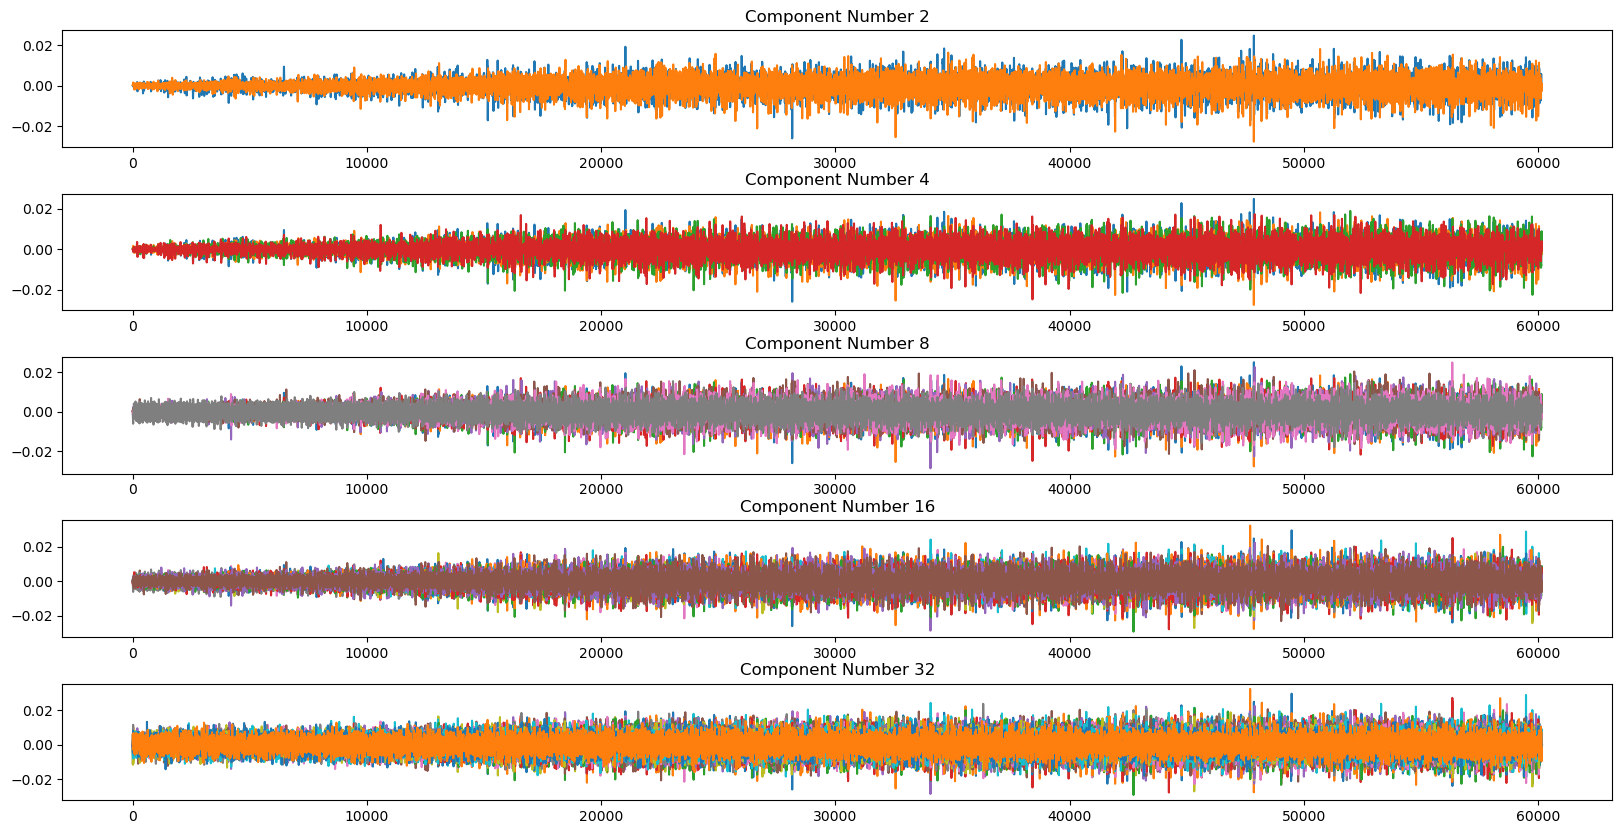

In [38]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_incr_1_pca)):
    
    ax = plt.subplot(len(H_list_incr_1_pca), 1, i + 1)
    plt.plot(H_list_incr_1_pca[i])
    
    ax.set_title(f"Component Number {n_comps[i]}")

    np.savetxt(output_directory + 'increase_mat_one_pca_compo_{}.csv'.format(n_comps[i]), H_list_incr_1_pca[i], delimiter=',')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

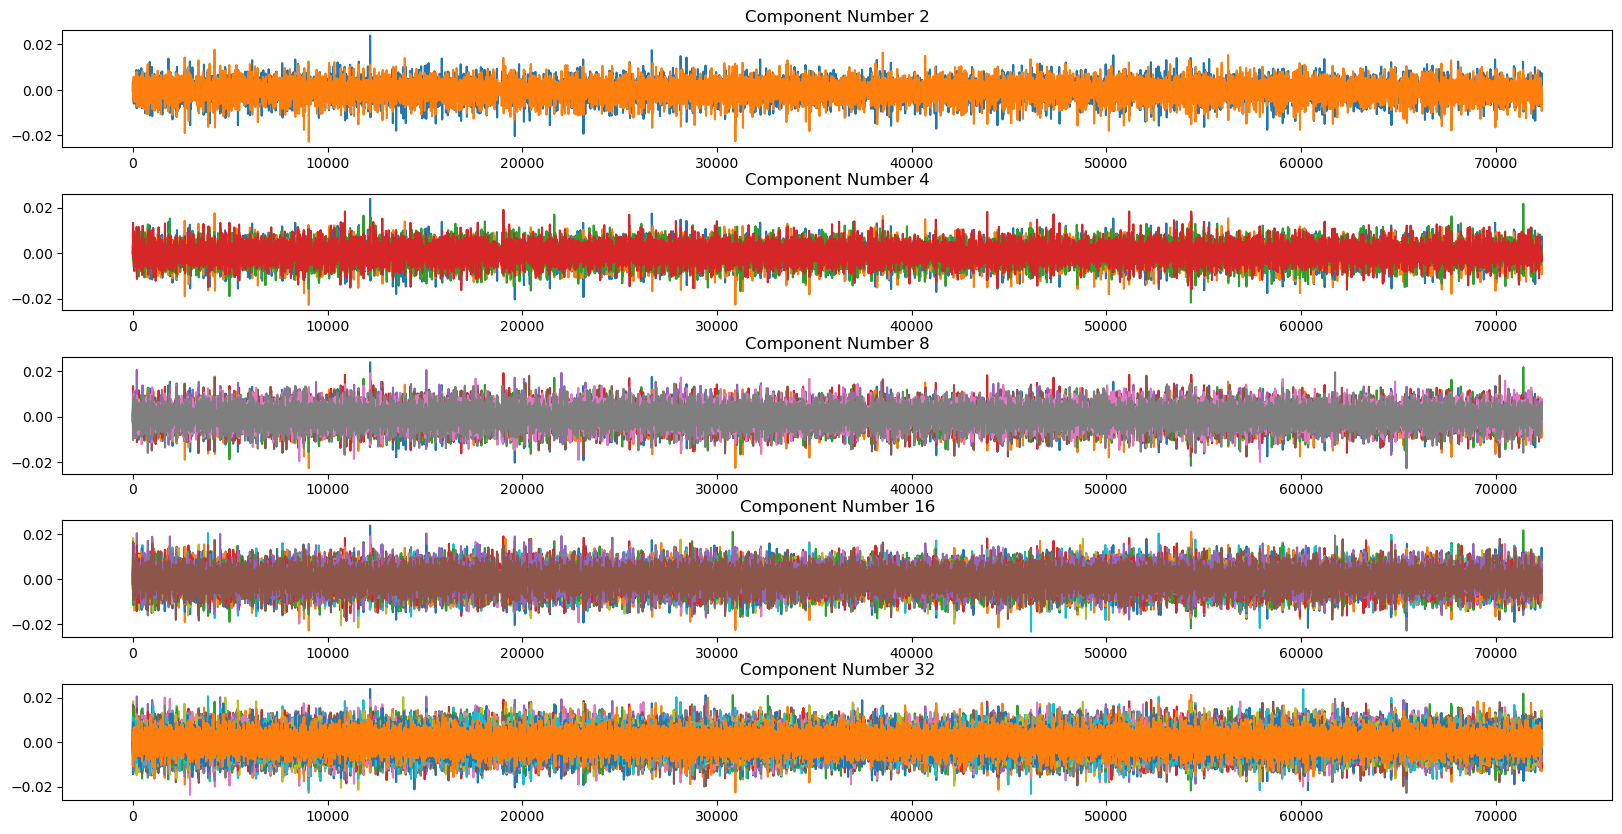

In [39]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_incr_2_pca)):
    
    ax = plt.subplot(len(H_list_incr_2_pca), 1, i + 1)
    plt.plot(H_list_incr_2_pca[i])
    
    ax.set_title(f"Component Number {n_comps[i]}")

    np.savetxt(output_directory + 'increase_mat_two_pca_compo_{}.csv'.format(n_comps[i]), H_list_incr_2_pca[i], delimiter=',')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

#### X method

In [ ]:
out_mat_incr_1 = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/increase_mat_one.csv", 
    delimiter=','
)
out_mat_incr_2 = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/increase_mat_two.csv", 
    delimiter=','
)
out_mat_steady = np.genfromtxt(
    "./MLSP-G2/preprocessed_data/steady_mat.csv", 
    delimiter=','
)
